In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.2 MB/s eta 0:00:00


In [4]:
import koreanize_matplotlib

In [13]:
# 데이터 로드
august_path = '/content/8월 자치구 고장률.csv'
df_aug = pd.read_csv(august_path, encoding='utf-8-sig')
september_path = '/content/9월 자치구 고장률.csv'
df_sep = pd.read_csv(september_path, encoding= 'utf-8-sig')

In [14]:
df_aug.sort_values(by='고장률(%)', ascending=False)

,자치구,고장신고건수,총대여수,고장률(%)
24,서초구,510,116728,0.436913
23,강남구,506,117743,0.429750
22,금천구,299,73411,0.407296
21,서대문구,272,70127,0.387868
20,동작구,286,74327,0.384786
19,관악구,326,90791,0.359066
18,동대문구,454,127197,0.356927
17,성북구,292,82727,0.352968
16,중구,312,88522,0.352455
15,마포구,638,181357,0.351792


In [15]:
df_sep.sort_values(by='고장률(%)', ascending=False)

,자치구,고장신고건수,총대여수,고장률(%)
24,서초구,632,131865,0.479278
23,금천구,347,73730,0.470636
22,강남구,573,129799,0.441452
21,동작구,350,80783,0.433259
20,서대문구,331,78269,0.422901
19,구로구,681,172061,0.395790
18,용산구,342,87805,0.389499
17,관악구,352,91504,0.384683
16,성동구,607,158102,0.383929
15,중구,339,90089,0.376295


In [19]:
df_merged = pd.merge(df_aug[['자치구', '고장률(%)']],
                     df_sep[['자치구', '고장률(%)']],
                     on='자치구',
                     suffixes=('_8월', '_9월'))

In [20]:
df_merged

,자치구,고장률(%)_8월,고장률(%)_9월
0,중랑구,0.267312,0.304681
1,광진구,0.277106,0.305569
2,강서구,0.287038,0.326814
3,강북구,0.287443,0.303270
4,노원구,0.295490,0.287339
5,은평구,0.296324,0.332698
6,영등포구,0.299294,0.343489
7,도봉구,0.318436,0.355273
8,구로구,0.322613,0.395790
9,강동구,0.323286,0.359124


In [24]:
df_merged[['고장률(%)_8월', '고장률(%)_9월']].corr()

,고장률(%)_8월,고장률(%)_9월
고장률(%)_8월,1.000000,0.929083
고장률(%)_9월,0.929083,1.000000


In [21]:
# 🔹 상관분석 (피어슨 상관계수)
correlation = df_merged[['고장률(%)_8월', '고장률(%)_9월']].corr().iloc[0, 1]

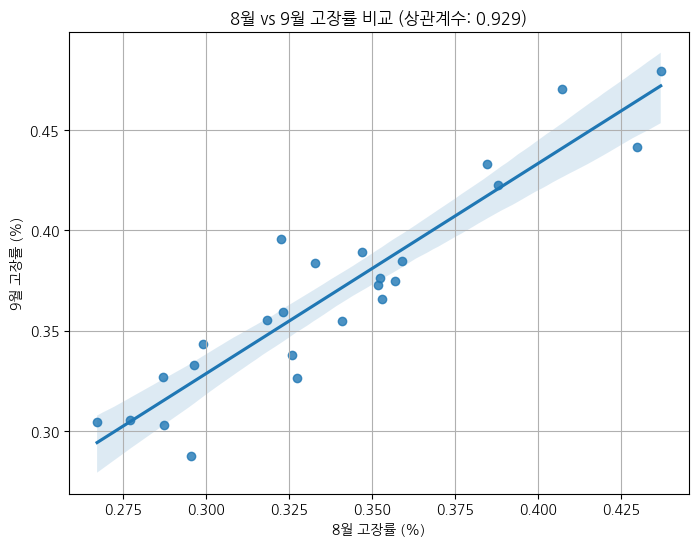

                            OLS Regression Results                            
Dep. Variable:              고장률(%)_9월   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     145.1
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.05e-11
Time:                        06:28:10   Log-Likelihood:                 64.254
No. Observations:                  25   AIC:                            -124.5
Df Residuals:                      23   BIC:                            -122.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0140      0.030      0.470      0.6

In [26]:
import statsmodels.api as sm


# 🔹 산점도 및 회귀선 시각화
plt.figure(figsize=(8,6))
sns.regplot(x=df_merged['고장률(%)_8월'], y=df_merged['고장률(%)_9월'])
plt.xlabel('8월 고장률 (%)')
plt.ylabel('9월 고장률 (%)')
plt.title(f'8월 vs 9월 고장률 비교 (상관계수: {correlation:.3f})')
plt.grid()
plt.show()

# 🔹 선형 회귀 분석
X = sm.add_constant(df_merged['고장률(%)_8월'])  # 상수항 추가
y = df_merged['고장률(%)_9월']

model = sm.OLS(y, X).fit()
print(model.summary())  # 회귀 분석 결과 출력


In [27]:
# 독립변수(X): 8월 고장률, 종속변수(Y): 9월 고장률
X = df_merged['고장률(%)_8월']
Y = df_merged['고장률(%)_9월']

# 상수 추가 (절편 포함)
X = sm.add_constant(X)

# 선형 회귀 모델 적합
model = sm.OLS(Y, X).fit()

# 결과 요약 표 생성
summary_df = pd.DataFrame({
    "Metric": ["회귀계수 (Coef)", "결정계수 (R²)", "p-value"],
    "Value": [model.params[1], model.rsquared, model.pvalues[1]]
})

# 표 출력
print(summary_df)

        Metric         Value
0  회귀계수 (Coef)  1.048517e+00
1    결정계수 (R²)  8.631960e-01
2      p-value  2.045139e-11
